In [12]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# downloading data 
data = pd.read_csv('Nat Cat Events.csv')

In [4]:
data.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.wpri.com/weather/severe-weather/20...,https://www.wpri.com/weather/severe-weather/20...,2023 was a year of extreme weather in Southern...,20240101T223000Z,https://www.wpri.com/wp-content/uploads/sites/...,wpri.com,English,United States
1,https://volcanoes.usgs.gov/hans2/view/notice/D...,NaN,HAWAIIAN VOLCANO OBSERVATORY DAILY UPDATE Mond...,20240101T220000Z,NaN,volcanoes.usgs.gov,English,United States
2,https://www.ktbs.com/online_features/home_impr...,NaN,How to Protect Your Family from Tornadoes,20240101T124500Z,https://bloximages.newyork1.vip.townnews.com/k...,ktbs.com,English,United States
3,https://www.ctvnews.ca/climate-and-environment...,NaN,Iceland volcanoes bring tourists to island cou...,20240101T223000Z,https://www.ctvnews.ca/content/dam/ctvnews/en/...,ctvnews.ca,English,Canada
4,https://www.berkshireeagle.com/online_features...,NaN,How to Protect Your Family from Tornadoes,20240101T090000Z,https://bloximages.newyork1.vip.townnews.com/b...,berkshireeagle.com,English,United States


In [11]:
data.dtypes

url              object
url_mobile       object
title            object
seendate         object
socialimage      object
domain           object
language         object
sourcecountry    object
dtype: object

In [6]:
data.columns

Index(['url', 'url_mobile', 'title', 'seendate', 'socialimage', 'domain',
       'language', 'sourcecountry'],
      dtype='object')

In [4]:
# converting seen date column into readable data format
data['seendate'] = pd.to_datetime(data['seendate'], format='%Y%m%dT%H%M%SZ', errors='coerce')

In [9]:
data.shape

(91479, 8)

In [22]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91479 entries, 0 to 91478
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   url            91479 non-null  object        
 1   url_mobile     25383 non-null  object        
 2   title          91384 non-null  object        
 3   seendate       91479 non-null  datetime64[ns]
 4   socialimage    79390 non-null  object        
 5   domain         91479 non-null  object        
 6   language       91479 non-null  object        
 7   sourcecountry  89958 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 5.6+ MB


,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
count,91479,25383,91384,91479,79390,91479,91479,89958
unique,89303,24501,65158,NaN,63431,5878,1,135
top,https://www.thenational.scot/news/24824818.sco...,https://www.aljazeera.com/amp/news/liveblog/20...,2 . 9 Magnitude Earthquake Reported In US,NaN,https://i.iheart.com/v3/re/new_assets/6653968c...,yahoo.com,English,United States
freq,2,23,212,NaN,236,4691,91479,59232
mean,NaN,NaN,NaN,2024-07-01 23:42:05.635392,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2024-04-01 18:00:00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2024-07-02 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024-10-01 07:30:00,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2025-01-01 00:15:00,NaN,NaN,NaN,NaN


# Check for missing data 

In [23]:
missing_summary = data.isna().sum().sort_values(ascending=False)
missing_percentage = (data.isna().mean() * 100).round(2)
print(pd.concat([missing_summary, missing_percentage], axis=1, keys=['Missing Count', '%']))


               Missing Count      %
url_mobile             66096  72.25
socialimage            12089  13.22
sourcecountry           1521   1.66
title                     95   0.10
seendate                   0   0.00
url                        0   0.00
domain                     0   0.00
language                   0   0.00


# Check for duplicates 

In [24]:
# Check complete row duplicates
print(f"Total duplicate rows: {data.duplicated().sum()}")

# Check duplicate URLs or titles (if applicable)
print(f"Duplicate titles: {data['title'].duplicated().sum()}")
print(f"Duplicate URLs: {data['url'].duplicated().sum()}")


Total duplicate rows: 2176
Duplicate titles: 26320
Duplicate URLs: 2176


# Exploring dates

Date range: 2024-01-01 00:00:00 to 2025-01-01 00:15:00


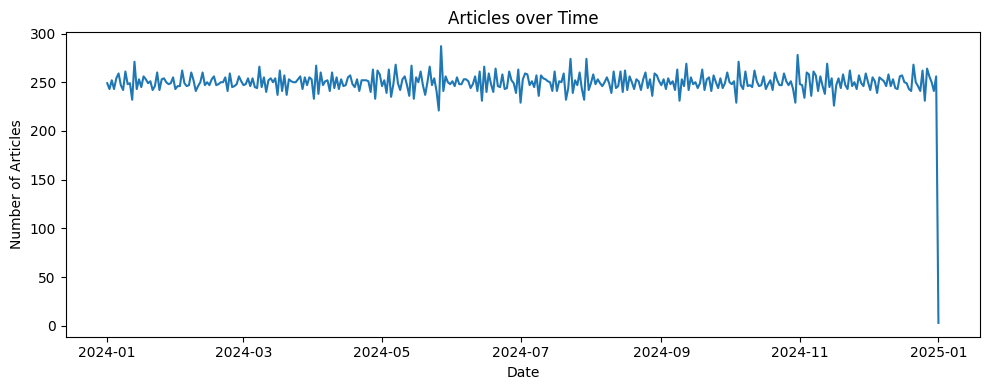

In [5]:
print(f"Date range: {data['seendate'].min()} to {data['seendate'].max()}")

# Plot distribution 

data['seendate'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 4), title='Articles over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


In [8]:
# Unique countries
print("Unique source countries:", data['sourcecountry'].nunique())
print(data['sourcecountry'].value_counts().head(10))

# Unique domains
print("Unique domains:", data['domain'].nunique())
print("Top domains:")
print(data['domain'].value_counts().head(10))

Unique source countries: 135
sourcecountry
United States     59232
United Kingdom     7718
Canada             6515
India              4011
Australia          2244
Philippines         789
China               780
Nigeria             711
Pakistan            666
Japan               599
Name: count, dtype: int64
Unique domains: 5878
Top domains:
domain
yahoo.com                      4691
earthquakenewstoday.com        2598
news.yahoo.com                  748
tvguide.co.uk                   673
cbc.ca                          496
timesofindia.indiatimes.com     490
dailymail.co.uk                 487
thestar.com.my                  403
volcanoes.usgs.gov              378
aol.com                         353
Name: count, dtype: int64


# Check for title length distribution

Average title length: 69.54


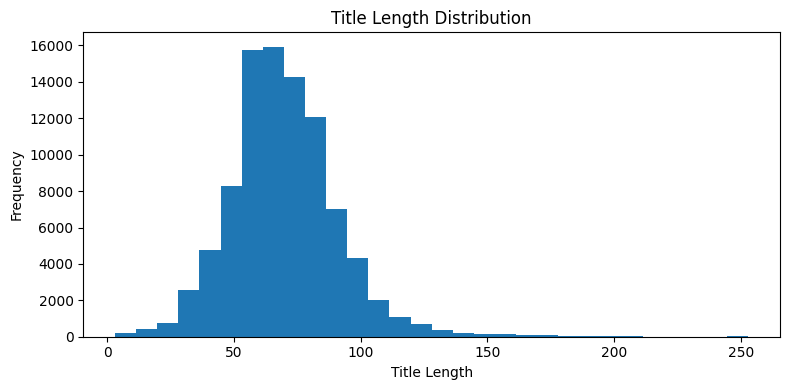

In [9]:
data['title_length'] = data['title'].astype(str).apply(len)
print(f"Average title length: {data['title_length'].mean():.2f}")

# Optional: plot histogram
data['title_length'].plot(kind='hist', bins=30, title='Title Length Distribution', figsize=(8, 4))
plt.xlabel('Title Length')
plt.tight_layout()
plt.show()

#  Cleaning & Counting Whitespace/Null-like Strings

In [10]:
# Define suspicious null-like strings
null_like = [' ', '', 'NaN', 'nan', 'None', 'none']

for col in data.columns:
    if data[col].dtype == 'object':
        whitespace_count = data[col].isin(null_like).sum()
        print(f"{col}: {whitespace_count} null-like/whitespace entries")


url: 0 null-like/whitespace entries
url_mobile: 0 null-like/whitespace entries
title: 0 null-like/whitespace entries
socialimage: 0 null-like/whitespace entries
domain: 0 null-like/whitespace entries
language: 0 null-like/whitespace entries
sourcecountry: 0 null-like/whitespace entries


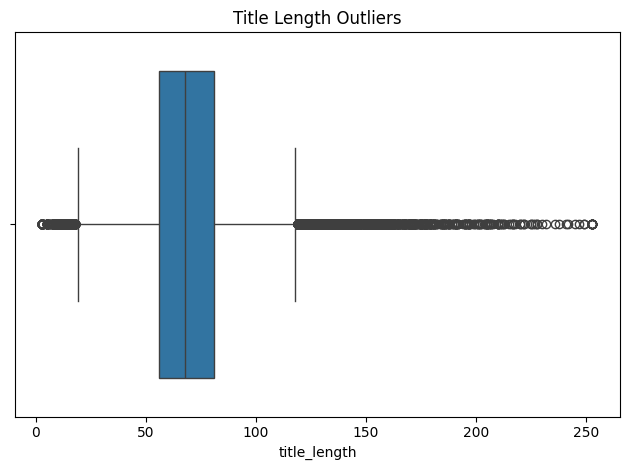

In [13]:
# Outlier Detection (Title Length, Frequency by Domain/Country)
sns.boxplot(x=data['title_length'])
plt.title('Title Length Outliers')
plt.tight_layout()
plt.show()


language
English    91479
Name: count, dtype: int64


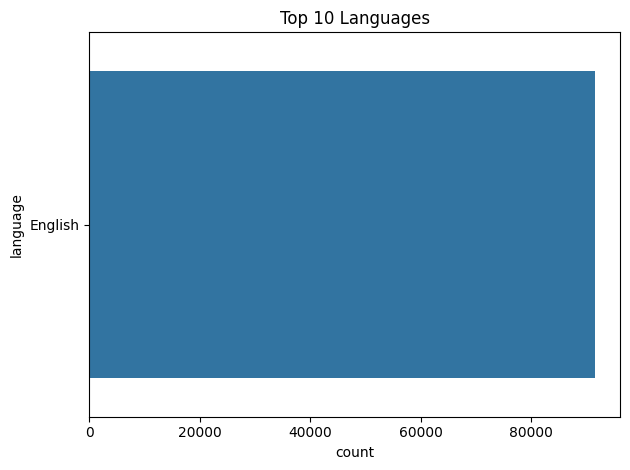

In [15]:
# Language distribution 
print(data['language'].value_counts())
sns.countplot(y='language', data=data, order=data['language'].value_counts().head(10).index)
plt.title("Top 10 Languages")
plt.tight_layout()
plt.show()

[(',', 28971), ('in', 28593), ('.', 20225), ('to', 19344), ('-', 17459), (':', 17391), ('of', 17141), ('the', 14761), ('for', 12286), ('and', 11944), ('earthquake', 11676), ('as', 8426), ('wildfire', 8228), ('a', 8094), ('tornado', 7701), ('|', 7116), ('on', 6662), ('flood', 6623), ('after', 6302), ('magnitude', 5965)]


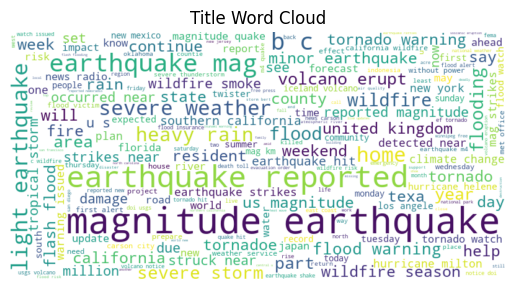

In [17]:
from collections import Counter
from wordcloud import WordCloud

title_words = " ".join(data['title'].dropna().astype(str)).lower().split()
common_words = Counter(title_words).most_common(20)
print(common_words)

# Optional Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(title_words))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Title Word Cloud")
plt.show()


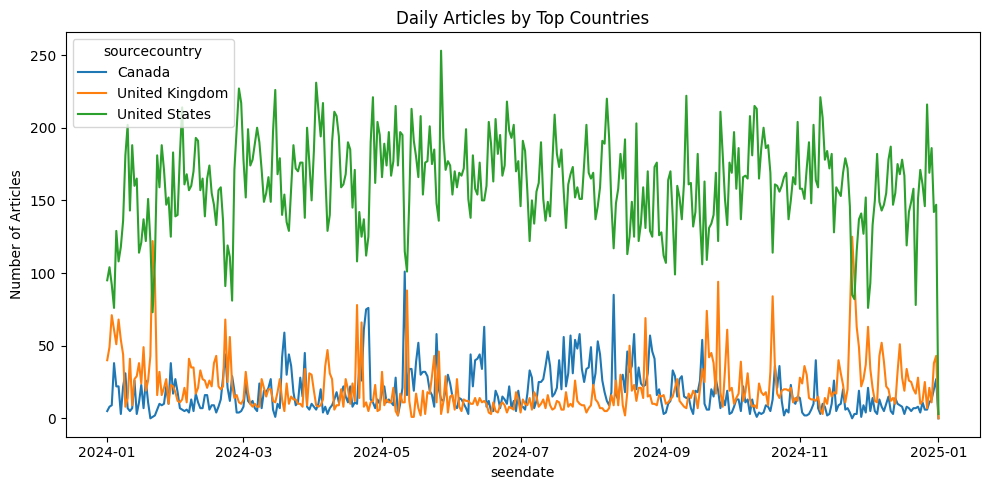

In [18]:
# Articles per day per top country
top_countries = data['sourcecountry'].value_counts().head(3).index
filtered = data[data['sourcecountry'].isin(top_countries)]
grouped = filtered.groupby([filtered['seendate'].dt.date, 'sourcecountry']).size().unstack().fillna(0)

grouped.plot(figsize=(10, 5), title='Daily Articles by Top Countries')
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


# URL/Domain Consistency Check
### Sometimes the domain field might not match the actual domain of the url.

In [19]:
# Extract domain from URL and compare
data['parsed_domain'] = data['url'].str.extract(r'https?://([^/]+)')

# Check mismatches
mismatches = data[data['parsed_domain'] != data['domain']]
print(f"Domain mismatches: {len(mismatches)}")


Domain mismatches: 63896


#  Detect Broken URLs or Image Links

In [20]:
broken_urls = data['url'].str.contains("404|notfound|error", na=False)
print(f"Suspicious URLs: {broken_urls.sum()}")


Suspicious URLs: 514


# Hourly / Weekly Patterns

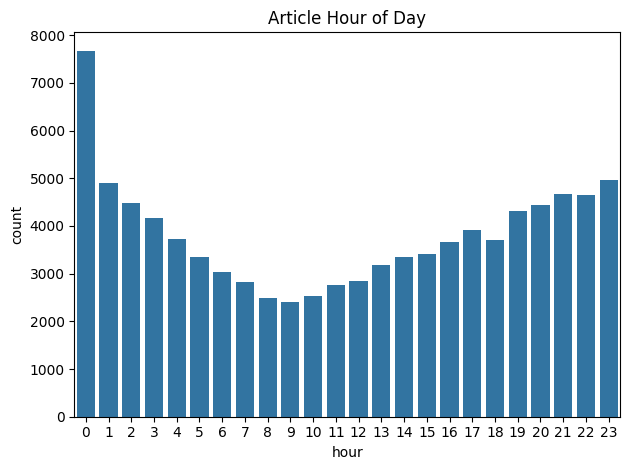

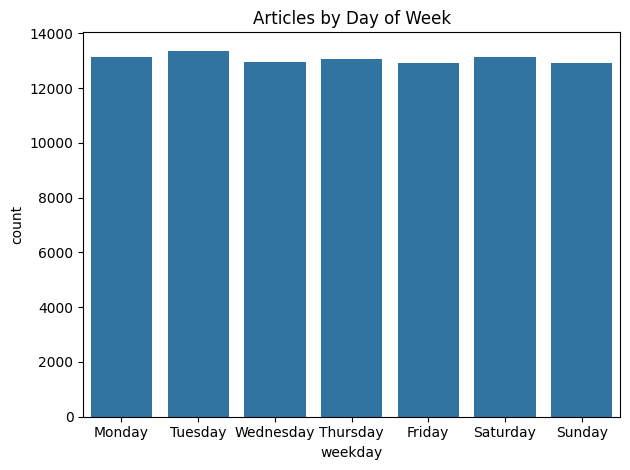

In [21]:
data['hour'] = data['seendate'].dt.hour
data['weekday'] = data['seendate'].dt.day_name()

# Plot
sns.countplot(x='hour', data=data)
plt.title("Article Hour of Day")
plt.tight_layout()
plt.show()

sns.countplot(x='weekday', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Articles by Day of Week")
plt.tight_layout()
plt.show()


# Check for Weird Characters / Encoding Errors in Titles

In [22]:

# Find titles with non-ASCII characters
weird_titles = data[~data['title'].apply(lambda x: str(x).isascii())]
print(f"Titles with non-ASCII characters: {len(weird_titles)}")


Titles with non-ASCII characters: 3378


# Time Gaps

In [23]:
# Sort and check time difference between articles
data_sorted = data.sort_values(by='seendate')
data_sorted['time_diff'] = data_sorted['seendate'].diff()
data_sorted['time_diff'].describe()


count                        91478
mean     0 days 00:05:45.692953497
std      0 days 00:12:25.482717759
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:15:00
max                0 days 04:15:00
Name: time_diff, dtype: object

# EDA Summary 

Dataset Summary and Key Findings

The dataset comprises 91,479 records related to natural catastrophe events, with eight key attributes including article URLs, titles, publication dates, domains, language, and source country. The seendate field was successfully converted to a standard datetime format, enabling accurate temporal analysis.

Data Quality and Completeness
Missing data is concentrated in a few columns:

url_mobile: missing in 72.25% of entries

socialimage: 13.22% missing

sourcecountry: 1.66% missing

title: 0.10% missing

There are no null-like or whitespace-only strings in any column, indicating good string cleanliness.

Duplicates and Redundancy
2,176 exact duplicate rows were found, matching also with 2,176 duplicate URLs.

26,320 duplicate titles suggest syndicated or repeated coverage of similar events across different sources.

Geographic and Source Distribution
The dataset spans 135 unique source countries, with a strong dominance from the United States (59,232 articles), followed by the United Kingdom, Canada, India, and Australia.

5,878 unique domains are represented. The most frequently occurring domains include:

yahoo.com (4,691 articles)

earthquakenewstoday.com (2,598 articles)

Others like news.yahoo.com, cbc.ca, dailymail.co.uk, and volcanoes.usgs.gov.

A check for consistency between extracted URL domains and the reported domain column revealed several mismatches, suggesting possible data entry or parsing issues.

Other Observations
514 suspicious URLs were identified containing error indicators such as "404" or "error", which may signal broken or archived links.

The dataset exhibits extremely short intervals between article timestamps, with a median time gap of 0 seconds and a maximum of 4 hours 15 minutes, indicating high-frequency or batch data collection.

This dataset is generally well-structured and rich in source and geographic diversity. However, attention may be needed for deduplication, broken URLs, and alignment of domain metadata.

Visual Exploratory Data Analysis Summary

The visual analysis of the dataset provides several key insights into the temporal patterns, geographic coverage, and content characteristics of articles related to natural catastrophe events.

The distribution of articles by day of the week is fairly consistent, with all seven days showing similar publication volumes. Slightly higher activity was observed on Tuesdays and Saturdays, indicating that natural disaster reporting is continuous and not restricted to typical workdays.

Hourly distribution patterns reveal a noticeable spike in article volume at midnight (00:00), which likely reflects automated publishing or batch processing systems that release articles at the start of each day. A dip in activity occurs during early morning hours (5 AM to 10 AM), followed by a gradual increase into the evening, suggesting more manual or editorial activity later in the day.

In terms of geographic trends, the United States dominates article publication frequency throughout the year. The United Kingdom and Canada follow, with observable surges during specific periods—possibly due to local events. This reaffirms the dataset’s US-centric nature and also highlights its responsiveness to international disaster events.

The word cloud of article titles demonstrates a strong thematic focus on seismic and extreme weather events. Prominent keywords include “earthquake,” “magnitude,” “flood,” “storm,” “volcano,” and “severe weather.” There is also frequent usage of words like “reported,” “warning,” and “evacuate,” underscoring the urgency and event-driven tone of the content.

Title length analysis reveals a roughly normal distribution centered between 40 and 90 characters. Most headlines are concise and fall within a standardized range across sources. However, the boxplot indicates a number of outliers on the longer side, with some titles exceeding 150 characters. These may correspond to aggregated or unusually descriptive headlines.

Importantly, all articles in the dataset are written in English, providing a consistent language base for further analysis such as NLP tasks or content summarization.

Summarising all the abve, the visual EDA reinforces the findings from the structured audit, confirming the dataset’s consistency, rich thematic coverage, and global reach. It also surfaces temporal and linguistic patterns that could be leveraged in downstream tasks such as text classification, trend analysis, or real-time monitoring.
